In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import umap

In [3]:
stars = pd.read_csv('/arc/home/aydanmckay/pris_sspp.csv')

In [5]:
stars1 = stars.loc[stars["g_chp_psf_p"] < 1e19]
stars2 = stars1.loc[stars1["r_chp_psf_p"] < 1e19]
stars3 = stars2.loc[stars2["i_chp_psf_p"] < 1e19]
stars4 = stars3.loc[stars3["z_chp_psf_p"] < 1e19]
stars5 = stars4.loc[stars4["y_chp_psf_p"] < 1e19]
stars7 = stars5.loc[stars5["MAG_AUTO_p"] < 95]
stars8 = stars7.loc[stars7["G_MAG_s"] > 0]
stars9 = stars8.loc[np.isnan(stars8["phot_g_mean_mag_1_p"]) == False]
stars10 = stars9.loc[np.isnan(stars9["phot_bp_mean_mag_1_p"]) == False]
stars11 = stars10.loc[np.isnan(stars10["phot_rp_mean_mag_1_p"]) == False]
stars12 = stars11.loc[stars11['LOGG_ADOP_s'] > -9000]
stars12.AFE_s.value_counts()

-9999.000000    2022
-9.999000        712
 0.164457        288
 0.021106         17
 0.064109         16
                ... 
 0.071589          1
 0.028956          1
 0.168603          1
 0.376179          1
 0.090317          1
Name: AFE_s, Length: 33039, dtype: int64

In [6]:
stars11.FEH_ADOP_s.value_counts()

-9999.000000    70630
-0.970938          18
-1.229497           4
-2.444104           4
-1.832760           4
                ...  
-0.172207           1
-0.632396           1
-0.400971           1
-0.048269           1
-0.124109           1
Name: FEH_ADOP_s, Length: 37697, dtype: int64

In [7]:
stars12 = stars12.loc[stars11['AFE_s'] > -9]
data = pd.DataFrame([stars12['CaHK_0_p']-stars12['phot_g_mean_mag_1_p'],stars12['CaHK_0_p']-stars12['phot_bp_mean_mag_1_p'],
                     stars12['CaHK_0_p']-stars12['phot_rp_mean_mag_1_p'],stars12['CaHK_0_p']-stars12['g_chp_psf_p'],
                     stars12['CaHK_0_p']-stars12['r_chp_psf_p'],stars12['CaHK_0_p']-stars12['i_chp_psf_p'],stars12['CaHK_0_p']-stars12['z_chp_psf_p'],
                     stars12['CaHK_0_p']-stars12['y_chp_psf_p'],stars12['CaHK_0_p']-stars12['MAG_AUTO_p'],stars12['CaHK_0_p']-stars12['V_MAG_s'],
                     stars12['CaHK_0_p']-stars12['G_MAG_s']]).T
# data.reset_index()
# newdata = data.reindex()
# data

In [8]:
df = pd.DataFrame({'P-G_gaia': [stars12['CaHK_0_p'][i]-stars12['phot_g_mean_mag_1_p'][i] for i in data.index],
                   'P-B_gaia': [stars12['CaHK_0_p'][i]-stars12['phot_bp_mean_mag_1_p'][i] for i in data.index],
                   'P-R_gaia': [stars12['CaHK_0_p'][i]-stars12['phot_rp_mean_mag_1_p'][i] for i in data.index],
                   'P-G_pan': [stars12['CaHK_0_p'][i]-stars12['g_chp_psf_p'][i] for i in data.index],
                   'P-R_pan': [stars12['CaHK_0_p'][i]-stars12['r_chp_psf_p'][i] for i in data.index],
                   'P-I_pan': [stars12['CaHK_0_p'][i]-stars12['i_chp_psf_p'][i] for i in data.index],
                   'P-Z_pan': [stars12['CaHK_0_p'][i]-stars12['z_chp_psf_p'][i] for i in data.index],
                   'P-Y_pan': [stars12['CaHK_0_p'][i]-stars12['y_chp_psf_p'][i] for i in data.index],
                   'P-AUTO_cfis': [stars12['CaHK_0_p'][i]-stars12['MAG_AUTO_p'][i] for i in data.index],
                   'P-V_sdss': [stars12['CaHK_0_p'][i]-stars12['V_MAG_s'][i] for i in data.index],
                   'P-G_sdss': [stars12['CaHK_0_p'][i]-stars12['G_MAG_s'][i] for i in data.index]},
                  index=np.arange(0,len(stars12)))
df2_otherdata = pd.DataFrame({'logg': [stars12['LOGG_ADOP_s'][i] for i in data.index],
                              'Fe/H': [stars12['FEH_ADOP_s'][i] for i in data.index],
                              'A/Fe' : [stars12['AFE_s'][i] for i in data.index],
                              'RA': [stars12['RA(CaHK)_p'][i] for i in data.index],
                              'Dec': [stars12['Dec(CaHK)_p'][i] for i in data.index]},
                             index=np.arange(0,len(stars12)))

In [9]:
reducer = umap.UMAP(random_state=42)
scaled_star_data = StandardScaler().fit_transform(df)
reducer.fit(scaled_star_data)

UMAP(random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [10]:
embedding = reducer.transform(scaled_star_data)

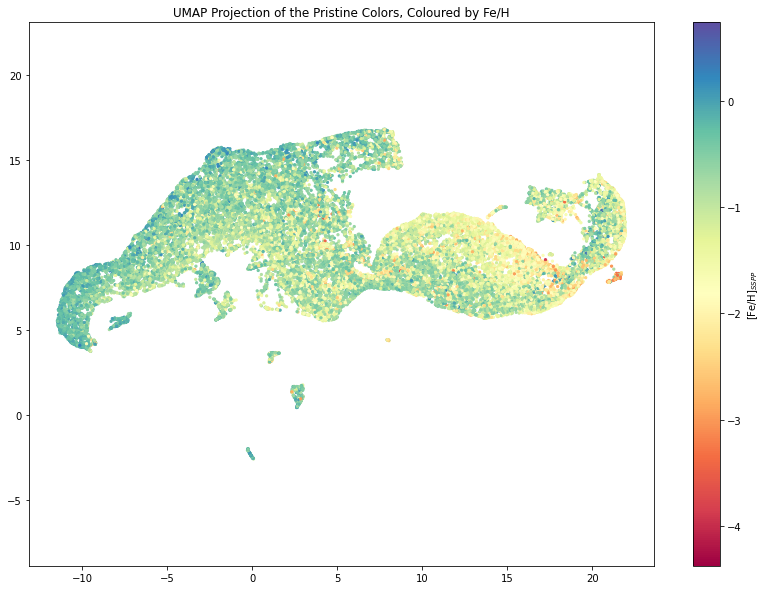

In [11]:
plt.figure(figsize=(14,10))
plt.scatter(embedding[:, 0], embedding[:, 1], c=df2_otherdata['Fe/H'], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
# plt.colorbar()
plt.title('UMAP Projection of the Pristine Colors, Coloured by Fe/H')
plt.colorbar(label=r'[Fe/H]$_{SSPP}$')
# plt.savefig('/arc/home/aydanmckay/pris_sdss_plot.png')

Text(0.5, 1.0, 'UMAP Projection of the Pristine Colors, Coloured by $\\alpha$/Fe')

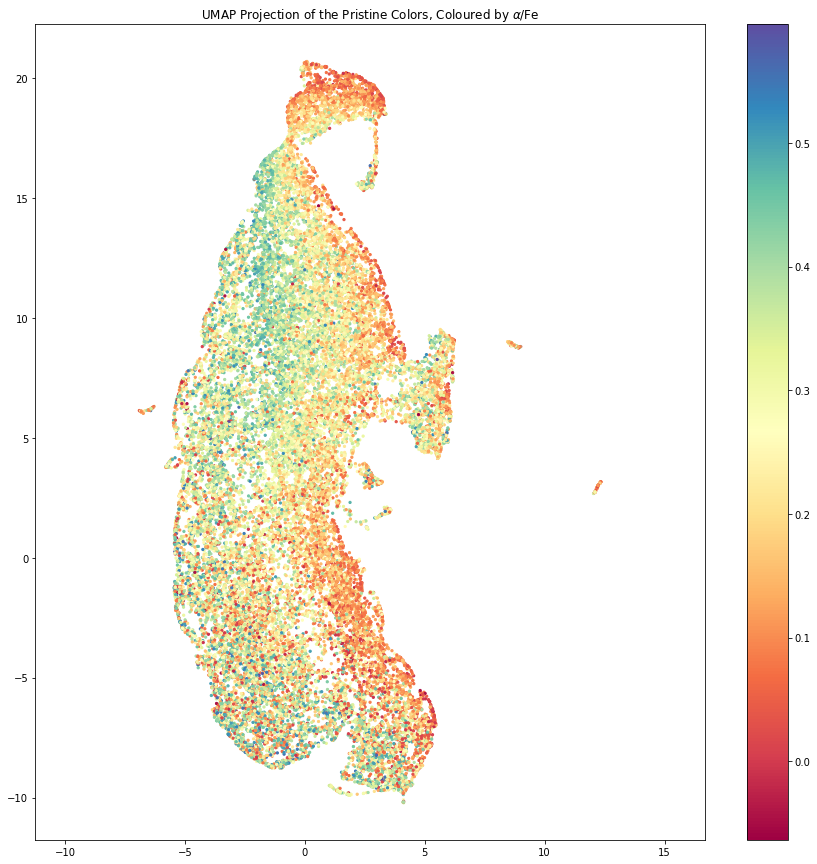

In [10]:
plt.figure(figsize=(15,15))
plt.scatter(embedding[:, 0], embedding[:, 1], c=df2_otherdata['A/Fe'], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar()
plt.title(r'UMAP Projection of the Pristine Colors, Coloured by $\alpha$/Fe')
# print(min(df2_otherdata['A/Fe']))

In [11]:
import umap.plot

In [12]:
# hover_data = pd.DataFrame({'logg':stars12['LOGG_ADOP_s'],
#                            'RA':stars12['RA(CaHK)_p'],
#                            'Dec':stars12['Dec(CaHK)_p'],
#                            'index':np.arange(len(stars12))})
# hover_data = pd.DataFrame({'logg':stars12['LOGG_ADOP_s'],
#                            'RA':stars12['RA(CaHK)_p'],
#                            'Dec':stars12['Dec(CaHK)_p']})
# umap.plot.output_notebook()

# # mapper = linear_cmap(field_name="logg", palette=Turbo256, low=min(stars12['LOGG_ADOP_s']), high=max(stars12['LOGG_ADOP_s']))

# p = umap.plot.interactive(reducer.fit(scaled_star_data), labels=stars12['FEH_ADOP_s'], hover_data=hover_data, point_size=4)

# # p = umap.plot.interactive(reducer, values=stars12['LOGG_ADOP_s'], cmap='Spectral', hover_data=hover_data, point_size=4)
# umap.plot.show(p)

In [13]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, ContinuousColorMapper
from bokeh.palettes import Spectral10

output_notebook()

Loading BokehJS ...

In [14]:
# digits_df = pd.DataFrame(embedding, columns=('x', 'y'))

# datasource = ColumnDataSource(digits_df)
# color_mapping = ContinuousColorMapper(domain=[df2_otherdata['Fe/H'][i] for i in df2_otherdata.index],palette=Spectral10)

# plot_figure = figure(
#     title='UMAP projection of the dataset',
#     plot_width=600,
#     plot_height=600,
#     tools=('pan, wheel_zoom, reset')
# )

# plot_figure.add_tools(HoverTool(tooltips="""
# <div>
#     <div>
#         <span style='font-size: 16px; color: #224499'>FE/H:</span>
#         <span style='font-size: 18px'>@fe</span>
#     </div>
# </div>
# """))

# plot_figure.circle(
#     'x',
#     'y',
#     source=datasource,
#     color=dict(field='fe', transform=color_mapping),
#     line_alpha=0.6,
#     fill_alpha=0.6,
#     size=4
# )
# show(plot_figure)

In [15]:
import umap.plot
umap.plot.output_file('/arc/home/aydanmckay/pristinecolours_feh_afecuts.html')
# umap.plot.output_notebook()

# mapper = linear_cmap(field_name="logg", palette=Turbo256, low=min(stars12['LOGG_ADOP_s']), high=max(stars12['LOGG_ADOP_s']))
# p = figure(title='UMAP of the data')
p = umap.plot.interactive(reducer.fit(scaled_star_data), values=df2_otherdata['Fe/H'], hover_data=df2_otherdata, point_size=4,
                         cmap = 'Spectral')

# p = umap.plot.interactive(reducer, values=stars12['LOGG_ADOP_s'], cmap='Spectral', hover_data=hover_data, point_size=4)
umap.plot.show(p)
# umap.plot.save(p,'/arc/home/aydanmckay/pristinecolours.html')

In [16]:
len(stars12)

35780